<a href="https://colab.research.google.com/github/Cal723/CSE-337-Labs/blob/main/lab12_SAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 12: Soft Actor Critic

Train a Soft Actor-Critic (SAC) agent on HalfCheetah-v4,
track its learning curve, and compare the result with your previous RL algorithm.

We will learn to use the **stable_baselines3** library


## To start
Run the following code that solves **the Pendulum problem**

In [1]:
# Install dependencies
!pip install "stable-baselines3[extra]" "gymnasium[classic_control]"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.2/187.2 kB 7.1 MB/s eta 0:00:00


The following code trains a full SAC agent — with two critics, entropy tuning, and replay buffer — out of the box

In [2]:
import gymnasium as gym
from stable_baselines3 import SAC

# Create environment
env = gym.make("Pendulum-v1")

# Create SAC model
model = SAC("MlpPolicy", env, verbose=1)

# Train the agent with N time steps
N = 4000
model.learn(total_timesteps=N)

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.38e+03 |
| time/              |           |
|    episodes        | 4         |
|    fps             | 41        |
|    time_elapsed    | 19        |
|    total_timesteps | 800       |
| train/             |           |
|    actor_loss      | 21        |
|    critic_loss     | 0.354     |
|    ent_coef        | 0.814     |
|    ent_coef_loss   | -0.317    |
|    learning_rate   | 0.0003    |
|    n_updates       | 699       |
----------------------------------


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.41e+03 |
| time/              |           |
|    episodes        | 8         |
|    fps             | 36        |
|    time_elapsed    | 43        |
|    total_timesteps | 1600      |
| train/             |           |
|    actor_loss      | 43.7      |
|    critic_loss     | 0.178     |
|    ent_coef        | 0.649     |
|    ent_coef_loss   | -0.605    |
|    learning_rate   | 0.0003    |
|    n_updates       | 1499      |
----------------------------------
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 200       |
|    ep_rew_mean     | -1.27e+03 |
| time/              |           |
|    episodes        | 12        |
|    fps             | 33        |
|    time_elapsed    | 72        |
|    total_timesteps | 2400      |
| train/             |           |
|    actor_loss      | 62.7      |
|    critic_loss    

# Visualize the result

In [3]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import gymnasium as gym
from stable_baselines3 import SAC
from IPython.display import HTML

env = gym.make("Pendulum-v1", render_mode="rgb_array")


N_steps = 500

frames = []
obs, _ = env.reset()
for _ in range(N_steps):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    frame = env.render()
    frames.append(frame)
    if done or truncated:
        obs, _ = env.reset()

env.close()

# Create matplotlib animation
fig = plt.figure()
img = plt.imshow(frames[0])

def animate(i):
    img.set_data(frames[i])
    return [img]

ani = animation.FuncAnimation(fig, animate, frames=len(frames), interval=30)

plt.close()
HTML(ani.to_html5_video())


/usr/local/lib/python3.12/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.12/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.12/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa

## Exercise 1: Soft Actor-Critic on HalfCheetah
**Goal:**
Adapt the existing Soft Actor-Critic (SAC) implementation from the Pendulum-v1 environment to train and evaluate a SAC agent on the more challenging HalfCheetah-v4 task.

### Instructions

1. Adapt your code: Modify your previous SAC implementation so that it runs on the HalfCheetah-v4 environment from MuJoCo.

2. Reward Logger:
Implement a custom RewardLogger callback to record episode rewards during training (you will have to search online about how to create a class for logger).
After training, use the logged data to plot the learning curve (episode reward vs. timesteps).

3. Experimentation:
    * Compare the performance of SAC on HalfCheetah-v4 with your previous algorithm.
    * Adjust the entropy temperature parameter (ent_coef or target_entropy) and observe how this affects: Exploration behavior, Convergence speed, and Final performance.

Answer the following questions
1. Did SAC reach a higher average reward or converge faster than your previous method?

2. How did changing the temperature for entropy affect the performance and stability of learning?

3. Describe any differences you observed in exploration or motion behavior of the agent.


### Deliverables

* Python notebook or script containing:
    * The adapted SAC training code
    * The RewardLogger implementation
    * Learning curve plots for SAC and your previous algorithm
    * Comparison of different entropy temperature settings

* The answer of the questions above

In [5]:
!pip install gymnasium[mujoco]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.5/243.5 kB 16.3 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/gymnasium/envs/registration.py:512: DeprecationWarning: WARN: The environment HalfCheetah-v4 is out of date. You should consider upgrading to version `v5`.
  logger.deprecation(


Using cpu device
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -206     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 33       |
|    time_elapsed    | 119      |
|    total_timesteps | 4000     |
| train/             |          |
|    actor_loss      | -33.5    |
|    critic_loss     | 1.05     |
|    ent_coef        | 0.314    |
|    ent_coef_loss   | -10.8    |
|    learning_rate   | 0.0003   |
|    n_updates       | 3899     |
---------------------------------
Using cpu device
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -137     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 35       |
|    time_elapsed    | 114      |
|    total_timesteps | 4000     |
| train/    

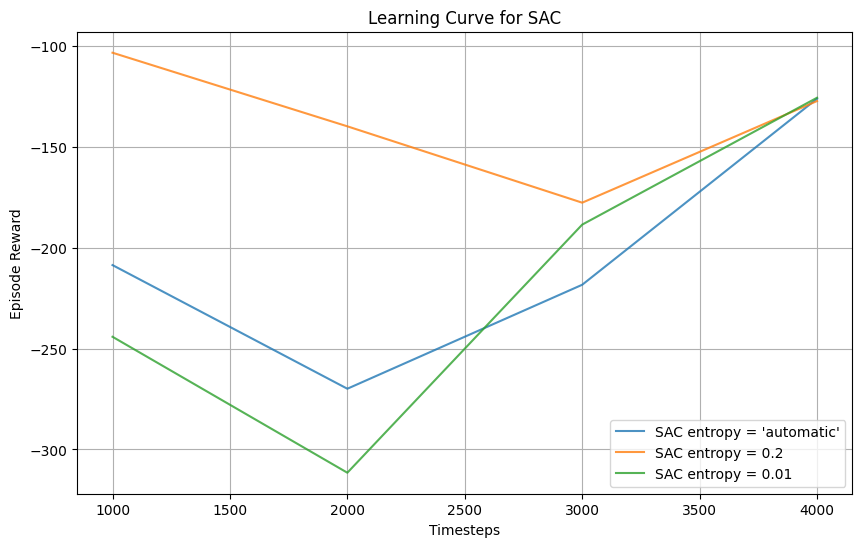

In [8]:
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.callbacks import BaseCallback

# used gpt for fixing my code
class RewardLogger(BaseCallback):
    def __init__(self, verbose=0):
        super().__init__(verbose)
        self.episode_rewards = []
        self.episode_timesteps = []

    #parallel environment allows for stepping throguh multiple at a time
    def _on_step(self) -> bool:
        infos = self.locals["infos"]
        dones = self.locals["dones"]

        # recording at reward at each step
        for i, done in enumerate(dones):
            if done and "episode" in infos[i]:# appending reward when done
                ep_info = infos[i]["episode"]
                self.episode_rewards.append(ep_info["r"])
                self.episode_timesteps.append(self.num_timesteps)

        return True


def run_sac(ent_coef='auto', total_steps=4000):
    env = Monitor(gym.make("HalfCheetah-v4"))

    reward_logger = RewardLogger(verbose=0)

    # this is Mip policy
    model = SAC(
        "MlpPolicy",
        env,
        verbose=1,
        ent_coef=ent_coef,
    )

    model.learn(total_timesteps=total_steps, callback=reward_logger)

    return reward_logger

def plot_learning_curve(all_results):

    plt.figure(figsize=(10, 6))
    for label, (timesteps, rewards, color) in all_results.items():
        plt.plot(timesteps, rewards, label=label, alpha=0.8)

    plt.xlabel("Timesteps")
    plt.ylabel("Episode Reward")
    plt.title("Learning Curve for SAC")
    plt.legend()
    plt.grid(True)
    plt.show()



results = {}
# using aunto entrpy
logger_default = run_sac(ent_coef='auto', total_steps=4000)
results["SAC entropy = 'automatic'"] = (
    logger_default.episode_timesteps,
    logger_default.episode_rewards,
    "blue",
)

    # .2
logger_high = run_sac(ent_coef=0.2, total_steps=4000)
results["SAC entropy = 0.2"] = (
    logger_high.episode_timesteps,
    logger_high.episode_rewards,
    "green",
)

    #.01
logger_low = run_sac(ent_coef=0.01, total_steps=4000)
results["SAC entropy = 0.01"] = (
    logger_low.episode_timesteps,
    logger_low.episode_rewards,
    "red",
)


plot_learning_curve(results)

Did SAC reach a higher average reward or converge faster than your previous method?

It reached a higher reward but converged slower.

How did changing the temperature for entropy affect the performance and stability of learning?

The higher termperature seemed to help SAC converge faster. This makes sense since it probably tries more unique things along the way.

Describe any differences you observed in exploration or motion behavior of the agent.

Well the exploration varied more witht he higher temperatures and seemed to try more different things. It somehow seemed closer towards the start as it began with higher rewards. This all decreased with lower temps.